# Assignment 2 - Data Preparation and Analysis

#### Developer: Joshua Mann

#### Course: Artificial Intelligence Applications

#### Program Requirements (data analysis and visualization steps):

1. Get
2. Clean
3. Prepare
4. Analyze
5. Visualize

In [1]:
# 1. import necessary modules
import sys
import os
import pandas as pd
print(sys.version)
print (os.environ['CONDA_DEFAULT_ENV'])

3.9.25 (main, Nov  3 2025, 22:44:01) [MSC v.1929 64 bit (AMD64)]
testenv


# Get data

In [2]:
# 2. get mortality data from National Center for Health Statistics
mortality_url = "https://data.cdc.gov/api/views/v6ab-adf5/rows.csv"

In [3]:
# 3. read csv file into DataFrame
mortality_data = pd.read_csv(mortality_url)

## Save DataFrame to pickle file

In [4]:
# 4. save DF to pickle file
mortality_data.to_pickle('mortality_data.pkl')

In [5]:
# 5. read pickle file
mortality_data = pd.read_pickle('mortality_data.pkl')

# (First - examine, then...), clean, prepare, analyze, and display data

## Cleaning

In [6]:
# 6. display first and last five rows with one command
print(mortality_data)

     Year    Age Group  Death Rate
0    1900    1-4 Years      1983.8
1    1901    1-4 Years      1695.0
2    1902    1-4 Years      1655.7
3    1903    1-4 Years      1542.1
4    1904    1-4 Years      1591.5
..    ...          ...         ...
471  2014  15-19 Years        45.5
472  2015  15-19 Years        48.3
473  2016  15-19 Years        51.2
474  2017  15-19 Years        51.5
475  2018  15-19 Years        49.2

[476 rows x 3 columns]


In [7]:
# 7. first 5 rows only
print(mortality_data.head())

   Year  Age Group  Death Rate
0  1900  1-4 Years      1983.8
1  1901  1-4 Years      1695.0
2  1902  1-4 Years      1655.7
3  1903  1-4 Years      1542.1
4  1904  1-4 Years      1591.5


In [8]:
# 8. last 3 rows only
mortality_data.tail(3)

,Year,Age Group,Death Rate
473,2016,15-19 Years,51.2
474,2017,15-19 Years,51.5
475,2018,15-19 Years,49.2


In [9]:
# 9. using pandas option_context() function, display 6 rows (first 3 and last 3) and all cols
with pd.option_context(
    'display.max_rows', 6,
    'display.max_columns', None):
    print(mortality_data)

     Year    Age Group  Death Rate
0    1900    1-4 Years      1983.8
1    1901    1-4 Years      1695.0
2    1902    1-4 Years      1655.7
..    ...          ...         ...
473  2016  15-19 Years        51.2
474  2017  15-19 Years        51.5
475  2018  15-19 Years        49.2

[476 rows x 3 columns]


## Display DataFrame attributes

In [10]:
# 10. print following Dataframe attributes: index, columns, size, and shape
print("Index: ", mortality_data.index)
print("Columns: ", mortality_data.columns)
print("Size: ", mortality_data.size)
print("Shape: ", mortality_data.shape)

Index:  RangeIndex(start=0, stop=476, step=1)
Columns:  Index(['Year', 'Age Group', 'Death Rate'], dtype='object')
Size:  1428
Shape:  (476, 3)


In [11]:
# 11. display DataFrame values in array format
print(mortality_data.values)

[[1900 '1-4 Years' 1983.8]
 [1901 '1-4 Years' 1695.0]
 [1902 '1-4 Years' 1655.7]
 ...
 [2016 '15-19 Years' 51.2]
 [2017 '15-19 Years' 51.5]
 [2018 '15-19 Years' 49.2]]


## Use columns attribute to change column names (i.e., remove any spaces)

In [12]:
# 12. use columns attribute, and replace() function to remove spaces in column names
# removing spaces in column names good practice
mortality_data.columns = mortality_data.columns.str.replace(" ", "")

In [13]:
# 13. print column names
print(mortality_data.columns)

Index(['Year', 'AgeGroup', 'DeathRate'], dtype='object')


In [14]:
# 14. print print column names with first 5 records
print(mortality_data.head())

   Year   AgeGroup  DeathRate
0  1900  1-4 Years     1983.8
1  1901  1-4 Years     1695.0
2  1902  1-4 Years     1655.7
3  1903  1-4 Years     1542.1
4  1904  1-4 Years     1591.5


## Use info(), nunique(), and describe() methods

In [15]:
# 15. print DataFrame information
mortality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       476 non-null    int64  
 1   AgeGroup   476 non-null    object 
 2   DeathRate  476 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 11.3+ KB


In [16]:
# 16. print DataFrame information, including accurate memory usage (using 'deep' value)
mortality_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       476 non-null    int64  
 1   AgeGroup   476 non-null    object 
 2   DeathRate  476 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 38.7 KB


In [17]:
# 17. summarize unique values (i.e., no duplicates) in each column
mortality_data.nunique()

Year         119
AgeGroup       4
DeathRate    430
dtype: int64

In [18]:
# 18. display generic stats for each numeric column - using describe() function
mortality_data.describe()

,Year,DeathRate
count,476.000000,476.000000
mean,1959.000000,192.924160
std,34.387268,293.224216
min,1900.000000,11.400000
25%,1929.000000,40.575000
50%,1959.000000,89.500000
75%,1989.000000,222.575000
max,2018.000000,1983.800000


In [19]:
# 19. transpose stats so that stat names are displayed in columns (using T property)
mortality_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,476.0,1959.00000,34.387268,1900.0,1929.000,1959.0,1989.000,2018.0
DeathRate,476.0,192.92416,293.224216,11.4,40.575,89.5,222.575,1983.8


In [20]:
# 20. save cleaned DataFrame to pickle file (mortality_cleaned.pkl)
mortality_data.to_pickle('mortality_cleaned.pkl')

In [21]:
# 21. read cleaned pickle file to mortality_data variable
mortality_data = pd.read_pickle('mortality_cleaned.pkl')

In [22]:
# 22. display first 5 rows of cleaned pickle file
print(mortality_data.head())

   Year   AgeGroup  DeathRate
0  1900  1-4 Years     1983.8
1  1901  1-4 Years     1695.0
2  1902  1-4 Years     1655.7
3  1903  1-4 Years     1542.1
4  1904  1-4 Years     1591.5


# Accessing data (Be Careful!)

## Access data (columns)

In [23]:
# 23. display first two records of DeathRate column using dot notation
print(mortality_data.DeathRate.head(2))

0    1983.8
1    1695.0
Name: DeathRate, dtype: float64


In [24]:
# 24. same as above using single brackets
print(mortality_data['DeathRate'].head(2))

0    1983.8
1    1695.0
Name: DeathRate, dtype: float64


In [25]:
# 25. same as above using double brackets
print(mortality_data[['DeathRate']].head(2))

   DeathRate
0     1983.8
1     1695.0


In [26]:
# 26. display DeathRate type using dot notation
print(type(mortality_data.DeathRate))

<class 'pandas.core.series.Series'>


In [27]:
# 27. display DeathRate type using single brackets
print(type(mortality_data['DeathRate']))

<class 'pandas.core.series.Series'>


In [28]:
# 28. display DeathRate type using double brackets
print(type(mortality_data[['DeathRate']]))

<class 'pandas.core.frame.DataFrame'>


In [29]:
# 29. access more than one column -- *must* use brackets
print(mortality_data[['Year','DeathRate']].head(2))

   Year  DeathRate
0  1900     1983.8
1  1901     1695.0


In [30]:
# 30. display Year and DeathRate type using double brackets
type(mortality_data[['Year','DeathRate']])

pandas.core.frame.DataFrame

## Accessing rows

In [31]:
# 31. access data using query() function (Year=1900)
print(mortality_data.query('Year==1900'))

     Year     AgeGroup  DeathRate
0    1900    1-4 Years     1983.8
119  1900    5-9 Years      466.1
238  1900  10-14 Years      298.3
357  1900  15-19 Years      484.8


In [32]:
# 32. access data using query() function (Year=2000 and AgeGroup != 1 - 4 Years)
print(mortality_data.query('Year == 2000 and AgeGroup != "1-4 Years"'))

     Year     AgeGroup  DeathRate
219  2000    5-9 Years       15.8
338  2000  10-14 Years       20.3
457  2000  15-19 Years       67.1


In [33]:
# 33. access data using query() function (Year=1900 or Year=2000), display first 5 records
print(mortality_data.query('Year == 1900 or Year == 2000').head())

     Year     AgeGroup  DeathRate
0    1900    1-4 Years     1983.8
100  2000    1-4 Years       32.4
119  1900    5-9 Years      466.1
219  2000    5-9 Years       15.8
238  1900  10-14 Years      298.3


## Access subset of rows and columns

In [34]:
# 34. using dot notation, access data using query() function (Year=1900), only for DeathRate column, display first 5 records
print(mortality_data.query('Year == 1900').DeathRate.head())

0      1983.8
119     466.1
238     298.3
357     484.8
Name: DeathRate, dtype: float64


In [35]:
# 35. using single bracket notation, access data using query() function (Year=1900), only for DeathRate column, display first 5 records
print(mortality_data.query('Year == 1900')['DeathRate'].head())

0      1983.8
119     466.1
238     298.3
357     484.8
Name: DeathRate, dtype: float64


In [36]:
# 36. using double bracket notation, access data using query() function (Year=1900), only for DeathRate column, display first 5 records
print(mortality_data.query('Year == 1900')[['DeathRate']].head())

     DeathRate
0       1983.8
119      466.1
238      298.3
357      484.8


In [37]:
# 37. display data type of dot notation used above
print(type(mortality_data.query('Year == 1900').DeathRate.head()))

<class 'pandas.core.series.Series'>


In [38]:
# 38. display data type of single bracket notation used above
print(type(mortality_data.query('Year == 1900')['DeathRate'].head()))

<class 'pandas.core.series.Series'>


In [39]:
# 39. display data type of double bracket notation used above
print(type(mortality_data.query('Year == 1900')[['DeathRate']].head()))

<class 'pandas.core.frame.DataFrame'>


In [40]:
# 40. using double bracket notation, access data using query() function (Year=1900)m for AgeGroup and DeathRate columns, display first 5 records
print(mortality_data.query('Year == 1900')[['AgeGroup', 'DeathRate']].head())

        AgeGroup  DeathRate
0      1-4 Years     1983.8
119    5-9 Years      466.1
238  10-14 Years      298.3
357  15-19 Years      484.8


## Access rows with loc[] accessor

In [41]:
# 41. display row values for 0, 5, and 10 index 'labels'
mortality_data.loc[[0,5,10]]

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
5,1905,1-4 Years,1498.9
10,1910,1-4 Years,1397.3


In [42]:
# 42. verify index 'labels' and row values
mortality_data.head(11)

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5
5,1905,1-4 Years,1498.9
6,1906,1-4 Years,1580.0
7,1907,1-4 Years,1468.3
8,1908,1-4 Years,1396.8
9,1909,1-4 Years,1348.9


In [43]:
# 43. access rows using *slice* (loc[] accessor includes stop value)
mortality_data.loc[4:6]

,Year,AgeGroup,DeathRate
4,1904,1-4 Years,1591.5
5,1905,1-4 Years,1498.9
6,1906,1-4 Years,1580.0


In [44]:
# 44. access rows using *slice*, include start, stop, and step values
mortality_data.loc[0:20:5]

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
5,1905,1-4 Years,1498.9
10,1910,1-4 Years,1397.3
15,1915,1-4 Years,924.2
20,1920,1-4 Years,987.2


In [45]:
# 45. access rows using conditional expression (Year=1917)
mortality_data.loc[mortality_data.Year == 1917]

,Year,AgeGroup,DeathRate
17,1917,1-4 Years,1066.0
136,1917,5-9 Years,290.7
255,1917,10-14 Years,218.9
374,1917,15-19 Years,380.3


In [46]:
# 46. display first and last 5 rows, of Year and AgeGroup columns using loc[] accessor, with slice and list")
mortality_data.loc[:, ['Year', 'AgeGroup']]

,Year,AgeGroup
0,1900,1-4 Years
1,1901,1-4 Years
2,1902,1-4 Years
3,1903,1-4 Years
4,1904,1-4 Years
...,...,...
471,2014,15-19 Years
472,2015,15-19 Years
473,2016,15-19 Years
474,2017,15-19 Years


## Access subset of rows and columns with loc[] accessor

In [47]:
# 47. using loc[] accessor with lists for row and column labels, display row values for 0, 5, and 10 index 'Labels',
# only for AgeGroup and DeathRate columns")
mortality_data.loc[[0,5,10],['AgeGroup','DeathRate']]

,AgeGroup,DeathRate
0,1-4 Years,1983.8
5,1-4 Years,1498.9
10,1-4 Years,1397.3


In [48]:
# 48. here, using slices of rows and column labels
mortality_data.loc[4:6, 'AgeGroup':'DeathRate']

,AgeGroup,DeathRate
4,1-4 Years,1591.5
5,1-4 Years,1498.9
6,1-4 Years,1580.0


## Access rows with iloc[] accessor

In [49]:
# 49. display first, sixth, and 11th rows
mortality_data.iloc[[0,5,10]]

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
5,1905,1-4 Years,1498.9
10,1910,1-4 Years,1397.3


In [50]:
# 50. verify index 'positions' and row values
mortality_data.head(11)

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5
5,1905,1-4 Years,1498.9
6,1906,1-4 Years,1580.0
7,1907,1-4 Years,1468.3
8,1908,1-4 Years,1396.8
9,1909,1-4 Years,1348.9


In [51]:
# 51. access rows using *slice*
mortality_data.iloc[4:6]

,Year,AgeGroup,DeathRate
4,1904,1-4 Years,1591.5
5,1905,1-4 Years,1498.9


In [52]:
# 52. access rows using *slice*, include start, stop, and step values
mortality_data.iloc[0:20:5]

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
5,1905,1-4 Years,1498.9
10,1910,1-4 Years,1397.3
15,1915,1-4 Years,924.2


In [53]:
# 53. display rows and columns using index positions and lists
mortality_data.iloc[[0,5,10],[1,2]]

,AgeGroup,DeathRate
0,1-4 Years,1983.8
5,1-4 Years,1498.9
10,1-4 Years,1397.3


In [54]:
# 54. display rows and columns using index positions and slices
mortality_data.iloc[4:7,1:3]

,AgeGroup,DeathRate
4,1-4 Years,1591.5
5,1-4 Years,1498.9
6,1-4 Years,1580.0


In [55]:
# 55. use iloc[] accessor with negative value
mortality_data.iloc[-10:]

,Year,AgeGroup,DeathRate
466,2009,15-19 Years,51.9
467,2010,15-19 Years,49.4
468,2011,15-19 Years,48.9
469,2012,15-19 Years,47.2
470,2013,15-19 Years,44.8
471,2014,15-19 Years,45.5
472,2015,15-19 Years,48.3
473,2016,15-19 Years,51.2
474,2017,15-19 Years,51.5
475,2018,15-19 Years,49.2


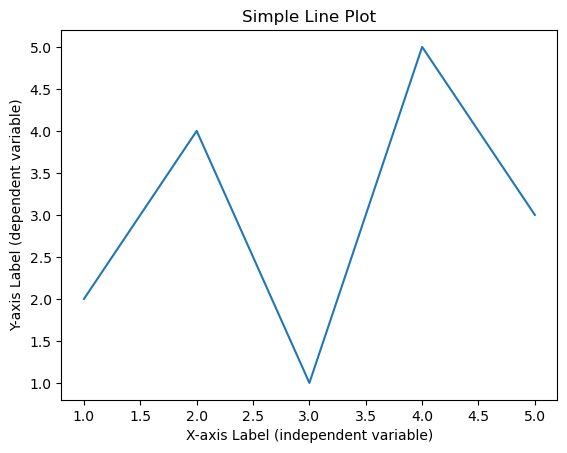

In [56]:
# 56. demo: simple visualization
import matplotlib.pyplot as plt
import numpy as np

# sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 1, 5, 3])

# create plot
plt.plot(x, y)

# add labels and title (optional)
plt.xlabel("X-axis Label (independent variable)")
plt.ylabel("Y-axis Label (dependent variable)")
plt.title("Simple Line Plot")

# display plot
plt.show()